In [2]:
from nltk.corpus import brown
import matplotlib.pyplot as plt
import nltk
from matplotlib import rcParams
import math
import numpy as np
from wordcloud import WordCloud
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

%matplotlib inline

### WordCloud

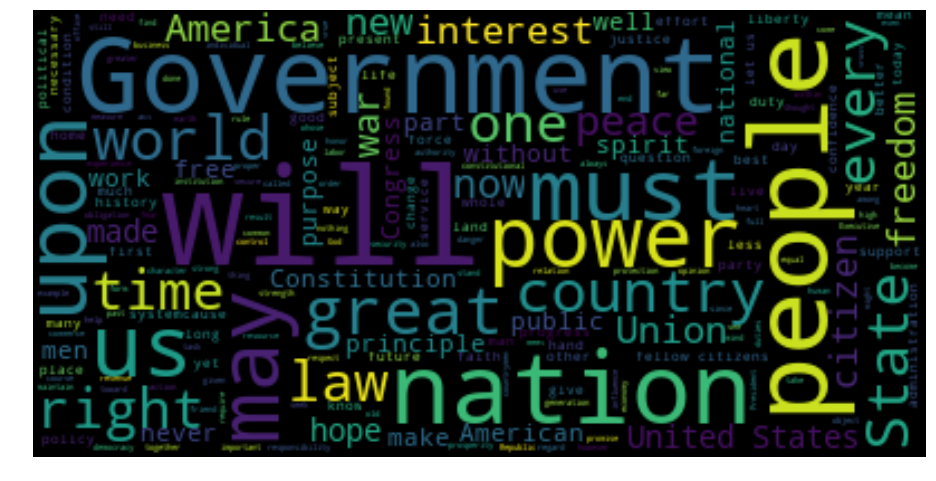

In [14]:
from nltk.corpus import inaugural

text = inaugural.raw()

wordcloud = WordCloud(max_font_size=60).generate(text)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Lexical dispersion plot

In [55]:
from  nltk.book import text4 as inaugural_speeches

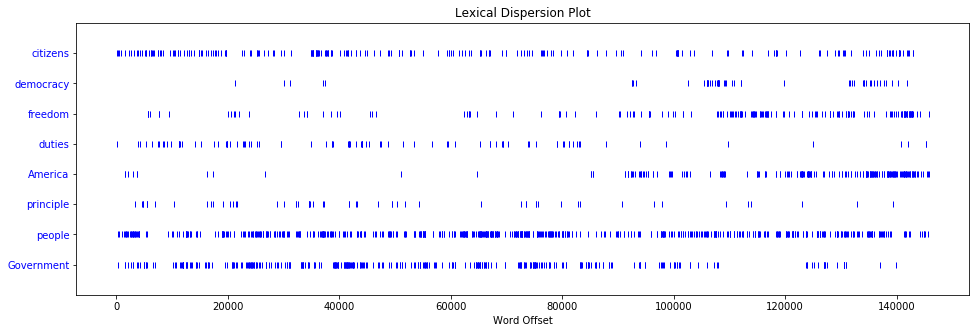

In [69]:
plt.figure(figsize=(16,5))
inaugural_speeches.dispersion_plot(["citizens", "democracy", "freedom", "duties", 
                                    "America",'principle','people','Government'])

### Frequency Distribution

In [2]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [116]:
topics = ['government', 'news', 'religion','adventure','hobbies']

for topic in topics:
    words = [word for word in brown.words(categories=topic) if word.lower() not in stop_words and word.isalpha() ]
    freqdist = nltk.FreqDist(words)
    print(topic,'more :', ' , '.join([ word.lower() for word, count in freqdist.most_common(5)]))
    print(topic,'less :', ' , '.join([ word.lower() for word, count in freqdist.most_common()[-5:]]))

government more : year , states , united , may , would
government less : wage , irregular , truest , designers , qualities
news more : said , would , one , last , two
news less : macphail , descendants , jointly , amending , plaza
religion more : god , world , one , may , new
religion less : habitable , reckless , mission , descendants , suppose
adventure more : said , would , man , back , one
adventure less : sprinted , rug , thundered , meek , jointly
hobbies more : one , may , time , two , first
hobbies less : majestic , draft , gourmets , fastenings , fears


### Most 5 Frequently occuring words
|government |news |religion |adventure |hobbies |
|--|--|--|--|--|
| year | said | god | said | one |
| states | would | world | would | may |
| united | one | one | man | time |
| may | last | may | back | two |
| would | two | new | one | first |

### Least 5 Frequently occuring words
| government | news | religion | adventure | hobbies |
|--|--|--|--|--|
| wage | macphail | habitable | sprinted | majestic |
| irregular | descendants | reckless | rug | draft |
| truest | jointly | mission | thundered | gourmets |
| designers | amending | descendants | meek | fastenings |
| qualities | plaza | suppose | jointly | fears |


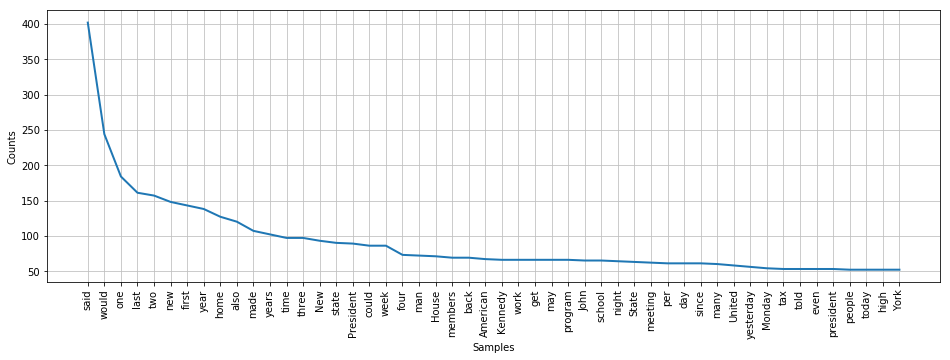

In [129]:
corpus_category = 'news'
words = [word for word in brown.words(categories=corpus_category) if word.lower() not in stop_words and word.isalpha() ]
freqdist = nltk.FreqDist(words)
plt.figure(figsize=(16,5))
freqdist.plot(50)

## Lexical divesity plot

In [4]:
def lexical_diversity(text):
    return round(len(set(text)) / len(text), 2)

In [5]:
def get_brown_corpus_words(category, include_stop_words=False):
    '''helper method to get word array for a particular category
     of brown corpus which may/may not include the stopwords that can be toggled
     with the include_stop_words flag in the function parameter'''
    if include_stop_words:
        words = [word.lower() for word in brown.words(categories=category) if word.isalpha() ]
    else:
        words = [word.lower() for word in brown.words(categories=category)
                 if word.lower() not in stop_words and word.isalpha() ]
    return words

In [18]:
for cat in brown.categories():
    lex_div_with_stop = lexical_diversity(get_brown_corpus_words(cat, True))
    lex_div = lexical_diversity(get_brown_corpus_words(cat, False))
    print(cat,lex_div , lex_div_with_stop)

adventure 0.26 0.13
belles_lettres 0.2 0.1
editorial 0.29 0.16
fiction 0.28 0.14
government 0.2 0.11
hobbies 0.25 0.13
humor 0.49 0.25
learned 0.16 0.09
lore 0.24 0.13
mystery 0.26 0.13
news 0.24 0.13
religion 0.32 0.16
reviews 0.39 0.21
romance 0.26 0.13
science_fiction 0.47 0.24


| Genre | Lexical diversity (w/o stopwords)| Lexical diversity (w/o stopwords) |
|---|---|
| Adventure | 0.26 | 0.13 |
| Belles Lettres | 0.2 | 0.1 |
| Editorial | 0.29 | 0.16 |
| Fiction | 0.28 | 0.14 |
| Government | 0.2 | 0.11 |
| Hobbies | 0.25 | 0.13 |
| Humor | 0.49 | 0.25 |
| Learned | 0.16 | 0.09 |
| Lore | 0.24 | 0.13 |
| Mystery | 0.26 | 0.13 |
| News | 0.24 | 0.13 |
| Religion | 0.32 | 0.16 |
| Reviews | 0.39 | 0.21 |
| Romance | 0.26 | 0.13 |
| Science Fiction | 0.47 | 0.24 |

In [11]:
def lexical_array(corpus_category = 'news', interval=5000):
    words = get_brown_corpus_words(corpus_category)
    prev = 0
    result = []
    for i in range(0,len(words), interval):
        seg_words = words[prev:i]
        if len(seg_words) > 0:
            result.append(lexical_diversity(seg_words))
        prev = i
    return result

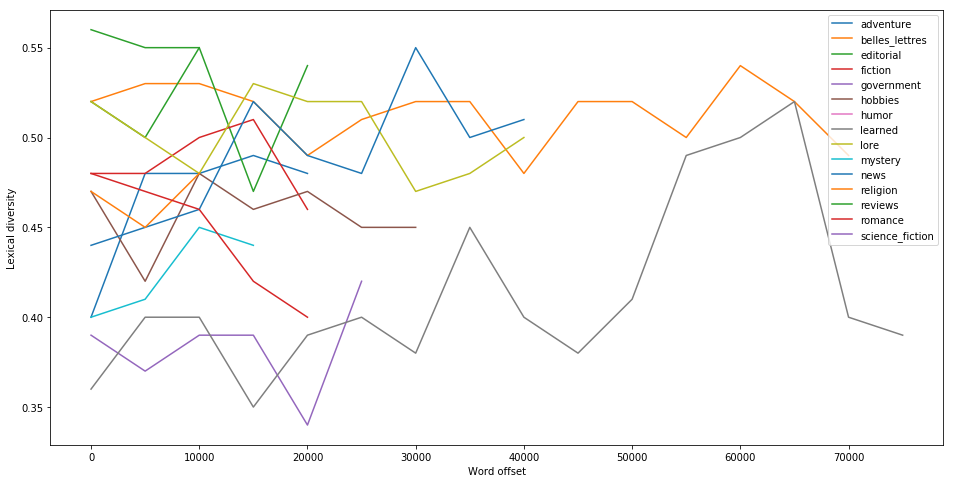

In [24]:
plt.figure(figsize=(16,8))
for cat in brown.categories():
    plot_array = lexical_array(cat)
    plt.plot(np.arange(0,len(plot_array))*5000,plot_array,label=cat)
plt.legend()
plt.xlabel('Word offset')
plt.ylabel('Lexical diversity')
plt.show()

### Word length distribution plot

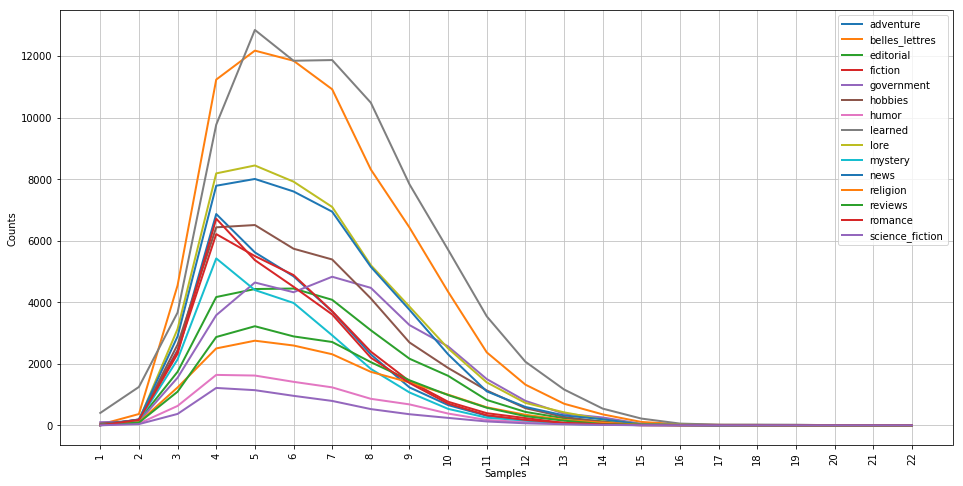

In [56]:
cfd = nltk.ConditionalFreqDist(
           (genre, len(word))
           for genre in brown.categories()
           for word in get_brown_corpus_words(genre))

plt.figure(figsize=(16,8))
cfd.plot()

### N-gram distribution plot

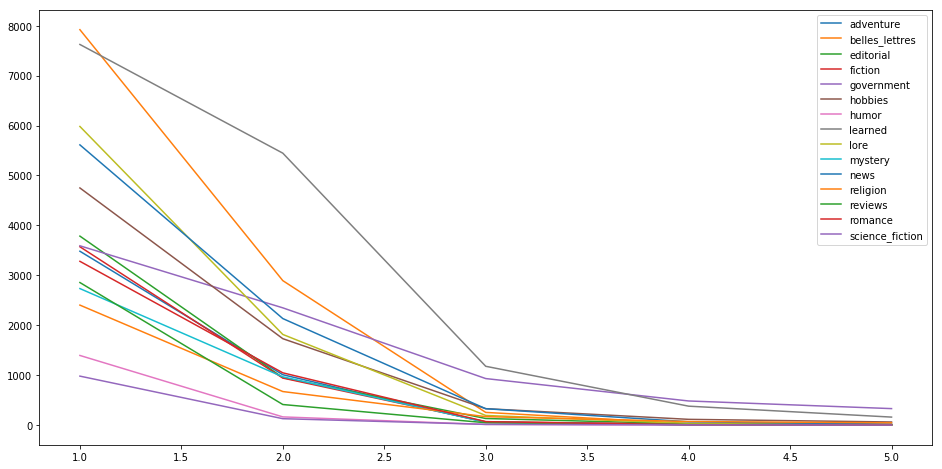

In [13]:
from nltk.util import ngrams
plt.figure(figsize=(16,8))
for genre in brown.categories():
    sol = []
    for i in range(1,6):
        count = 0
        fdist = nltk.FreqDist(ngrams(get_brown_corpus_words(genre), i))
        sol.append(len([cnt for ng,cnt in fdist.most_common() if cnt > 1]))
    plt.plot(np.arange(1,6), sol, label=genre)

plt.legend()
plt.show()